In [241]:
import statistics as stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [242]:
the_number_of_d = 16
the_number_of_test_case = 10
the_number_of_time = 3
the_number_of_time_kernel = 5

In [243]:
file1 = open("norm.txt", "r")

In [244]:
result = []
for i in range(0, the_number_of_d):
        result.append([])
        for j in range(0, the_number_of_time):
            result[i].append([])

In [245]:
count = 0
while count < the_number_of_d*the_number_of_test_case*the_number_of_time:
    line = file1.readline()
    if not line:
        break
    d = count//(the_number_of_test_case*the_number_of_time)
    t = (count%(the_number_of_test_case*the_number_of_time))%the_number_of_time
    result[d][t].append(float(line.strip()))
    count += 1

In [246]:
file1.close()

In [247]:
file2 = open("norm_kernel.txt", "r")

In [248]:
result_kernel = []
for i in range(0, the_number_of_d):
    result_kernel.append([])
    for j in range(0, the_number_of_time_kernel):
        result_kernel[i].append([])

In [249]:
count = 0
while count < the_number_of_d*the_number_of_test_case*the_number_of_time_kernel:
    line = file2.readline()
    if not line:
        break
    d = count//(the_number_of_test_case*the_number_of_time_kernel)
    t = (count%(the_number_of_test_case*the_number_of_time_kernel))%the_number_of_time_kernel
    result_kernel[d][t].append(float(line.strip()))
    count += 1 

In [250]:
file2.close()

In [251]:
mean = []
standard_deviation = []
for i in range(0, the_number_of_d):
    mean.append([])
    standard_deviation.append([])

In [252]:
for i in range(0, the_number_of_d):
    for j in range(0, the_number_of_time):
        data = result[i][j]
        m = stats.mean(data)
        std = stats.stdev(data)
        mean[i].append(m)
        standard_deviation[i].append(std)

In [253]:
mean_kernel = []
standard_deviation_kernel = []
for i in range(0, the_number_of_d):
    mean_kernel.append([])
    standard_deviation_kernel.append([])

In [254]:
for i in range(0, the_number_of_d):
    for j in range(0, the_number_of_time_kernel):
        data = result_kernel[i][j]
        m = stats.mean(data)
        std = stats.stdev(data)
        mean_kernel[i].append(m)
        standard_deviation_kernel[i].append(std)

In [255]:
time = []
time_kernel = []
target = []
dimension = []
for i in range(0, the_number_of_d):
    time.append(mean[i][1])
    time_kernel.append(mean_kernel[i][3])
    target.append(((mean[i][1] - mean_kernel[i][3])/mean_kernel[i][3])*100)
    dimension.append(4*(i+1))

In [256]:
def func1(x, a, b):
    return a*x + b

def func2(x, a, b):
    return b

In [257]:
popt1, pcov1 = curve_fit(func1, dimension, time)
popt2, pcov2 = curve_fit(func2, dimension, time_kernel)
popt3, pcov3 = curve_fit(func1, dimension, target)

C:\Users\hjw4\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


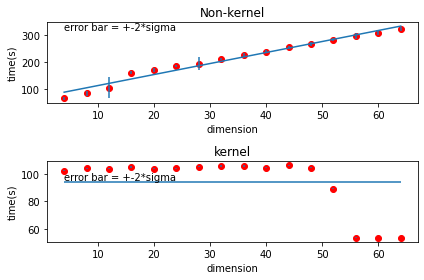

In [258]:
plt.subplot(2,1,1)
plt.scatter(dimension, time, color = 'red')
plt.plot(np.array(dimension), func1(np.array(dimension), popt1[0], popt1[1]))
for i in range(0, the_number_of_d):
    plt.vlines(dimension[i], time[i] - 2*standard_deviation[i][1], time[i] + 2*standard_deviation[i][1])
plt.text(dimension[0], func1(dimension[-2], popt1[0], popt1[1]), 'error bar = +-2*sigma')
plt.title('Non-kernel')
plt.xlabel('dimension')
plt.ylabel('time(s)')

plt.subplot(2,1,2)
plt.scatter(dimension, time_kernel, color = 'red')
plt.hlines(popt2[1], dimension[0], dimension[-1])
for i in range(0, the_number_of_d):
    plt.vlines(dimension[i], time_kernel[i] - 2*standard_deviation_kernel[i][4], time_kernel[i] + 2*standard_deviation_kernel[i][4])
plt.text(dimension[0], popt2[1] + 1, 'error bar = +-2*sigma')
plt.title('kernel')
plt.xlabel('dimension')
plt.ylabel('time(s)')

plt.tight_layout()
plt.show()

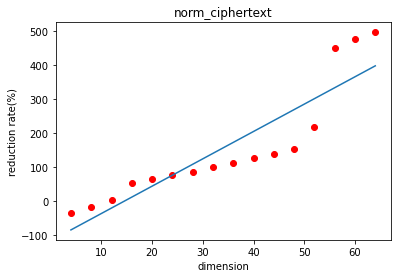

In [259]:
plt.scatter(dimension, target, color = 'red')
plt.plot(np.array(dimension), func1(np.array(dimension), popt3[0], popt3[1]))
plt.title('norm_ciphertext')
plt.xlabel('dimension')
plt.ylabel('reduction rate(%)')

plt.show()

In [260]:
standard_deviation

[[0.023022923441165723, 2.3206402452053334, 0.024780608906517673],
 [0.12380927419381797, 4.186011525757877, 0.06055769305197967],
 [0.26196301252369364, 20.01231632445102, 0.31937546676808676],
 [0.08984568009772213, 2.742015700173874, 0.3321281348131235],
 [0.1475421787866477, 3.1658313354385164, 0.28704017640586676],
 [0.11514701472948011, 1.82721752338844, 0.2306576974749475],
 [0.21948011259944866, 11.839448045036185, 0.27403555852804545],
 [0.13013388838679443, 1.6449997771023144, 0.31786929438930633],
 [0.1706988821840638, 3.5757536517184474, 0.22259823963814276],
 [0.1006149390056522, 2.7613897789176933, 0.19417453912509863],
 [0.1019432292776502, 2.274191959062973, 0.2501907120689248],
 [0.22822693298070187, 3.4268347705199402, 0.20940682469245783],
 [0.07876339939619442, 3.1344760256788575, 0.23335517740845904],
 [0.08977717446235677, 5.0219317487286625, 0.23765643949243676],
 [0.1251679960914752, 3.595525560409149, 0.08353137976566383],
 [0.15586636149100436, 3.5211131273441